In [1]:
pip install transformers

  Using cached transformers-4.1.1-py3-none-any.whl (1.5 MB)
  Using cached tokenizers-0.9.4-cp36-cp36m-manylinux2010_x86_64.whl (2.9 MB)
  Using cached regex-2020.11.13-cp36-cp36m-manylinux2014_x86_64.whl (723 kB)
  Using cached tqdm-4.55.2-py2.py3-none-any.whl (68 kB)
  Using cached dataclasses-0.8-py3-none-any.whl (19 kB)
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached packaging-20.8-py2.py3-none-any.whl (39 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached sacremoses-0.0.43-py3-none-any.whl
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
# pip install torchvision 

     |████████████████████████████████| 12.8 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 776.8 MB 26 kB/s s eta 0:00:01
     |████████████████████████████████| 2.2 MB 51.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U matplotlib

  Using cached matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached Pillow-8.1.0-cp36-cp36m-manylinux1_x86_64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# pip install tensorflow

In [3]:
!pip list | grep "tensorflow"   # Check tensorflow==2.0.0, tensorflow-gpu==2.0.0
!pip list | grep "transformers" # Check transformers>=2.0.0

tensorflow                         2.4.0     
tensorflow-estimator               2.4.0     
tensorflow-gpu                     2.4.0     
transformers                       4.1.1     


In [2]:
# pip install tensorflow

In [3]:
# !pip install --upgrade tensorflow-gpu

In [2]:
pip install -U scikit-learn

  Using cached scikit_learn-0.24.0-cp36-cp36m-manylinux2010_x86_64.whl (22.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 

dir_name= os.getcwd()+'/data/'

In [3]:
from transformers import BertTokenizer, TFBertForSequenceClassification,TFBertModel
from transformers import InputExample, InputFeatures


model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  2307      
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [5]:
# nasdaq_files="/userhome/cs/wuxue/Sentiment_Analysis/stock_ticker_datasets/nasdaq.csv"
# nyse_files="/userhome/cs/wuxue/Sentiment_Analysis/stock_ticker_datasets/nyse.csv"
# nasdaq=pd.read_csv(nasdaq_files) 
# nyse=pd.read_csv(nyse_files)

# nasdaq['Symbol']=nasdaq['Symbol'].astype(str)
# nasdaq_input=nasdaq['Symbol']

# nyse['Symbol']=nyse['Symbol'].astype(str)
# nyse_input=nyse['Symbol']
# # 3081
# n = 100  #chunk row size
# nasdaq_df = [nasdaq_input[i:i+n] for i in range(0,nasdaq_input.shape[0],n)]
# nyse_df = [nyse_input[i:i+n] for i in range(0,nyse_input.shape[0],n)]
# df=nasdaq_df+nyse_df

In [ ]:
# df = pd.DataFrame()
# for list in nasdaq_df:
#      for name in list:
#             try:
#                 df_tweets = pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/data-tweets/data-$%s-tweets.csv'%name ,names=['dates','tweets'],index_col='dates')
#                 df_dates=pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/stock_label/data-%s-label.csv'%name,names=['dates','label'],index_col='dates')

#                 merge=pd.merge(df_tweets,df_dates, how='inner', left_index=True, right_index=True)
#                 df=df.append(merge)
                
#             except:
#                 print('no such file exist')
#                 pass
# df.to_csv('labelled_tweets.csv')

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def read_tweets(name):
   
    print('reading tweets..')
    
    df = pd.read_csv(name)
    print(df)

    df = df.drop(['Unnamed: 0','dates','ticker','compound_vader_score'],axis=1)
    df=df.reset_index(drop=True)
    df=df.dropna()
    
    possible_labels = df.pred_label.unique()
    label_dict = {}
    for index, possible_label in enumerate(possible_labels):
        label_dict[possible_label] = index
    
    df['label'] = df.label.replace(label_dict)
    df['pred_label'] = df.pred_label.replace(label_dict)
    x_train,y_train=train_test_split(df,test_size=0.2,random_state=0,stratify=df.pred_label.values)
#     print(x_train)
    return x_train,y_train
# read_tweets('nasdaq_labelled_tweets.csv')

def read_news(name):
    print('reading news..')
    
    df = pd.read_csv(name)
    print(df)
   
    df = df.drop(['Unnamed: 0','dates','ticker','compound_vader_score'],axis=1)
    df=df.reset_index(drop=True)
    df=df.dropna()
#     label_dict = {0:1,1:2,2:3}
    possible_labels = df.pred_label.unique()
    label_dict = {}
    for index, possible_label in enumerate(possible_labels):
        label_dict[possible_label] = index
    print(label_dict)

    df['pred_label'] = df.pred_label.replace(label_dict)
    x_train,y_train=train_test_split(df,
                                     test_size=0.2,
                                     random_state=0,
                                     stratify=df.pred_label.values)
#     print(x_train)
    return x_train,y_train

In [7]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
    print('converting data')
    
    train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

    validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
    return train_InputExamples, validation_InputExamples

# train_InputExamples, validation_InputExamples = convert_data_to_examples(x_train,  y_train, 'tweets_x', 'tweets_y')
  


In [8]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    print('converting examples to tf_datasets')
    features = [] # -> will hold InputFeatures to be converted later
    
    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )
    def gen():
        
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )



In [9]:
def model_train(file_name):
    print('model training')
    x_train,y_train=read_tweets(file_name)    

    train_InputExamples, validation_InputExamples = convert_data_to_examples(x_train, y_train, 'tweets', 'pred_label')
#     print(train_InputExamples)
#     train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
    train_data = convert_examples_to_tf_dataset(train_InputExamples.values.tolist(), tokenizer)
    print(train_data)
    train_data = train_data.shuffle(100).batch(15).repeat(2)


    validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
#     validation_data = convert_examples_to_tf_dataset(validation_InputExamples.values.tolist(), tokenizer)
    validation_data = validation_data.batch(15)
    return train_data,validation_data

def news_model_train(file_name):
    print('model training')
    x_train,y_train=read_news(file_name)    

    train_InputExamples, validation_InputExamples = convert_data_to_examples(x_train, y_train, 'news', 'pred_label')
#     print(train_InputExamples)
#     train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
    train_data = convert_examples_to_tf_dataset(train_InputExamples.values.tolist(), tokenizer)
    print(train_data)
    train_data = train_data.shuffle(100).batch(15).repeat(2)


    validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
#     validation_data = convert_examples_to_tf_dataset(validation_InputExamples.values.tolist(), tokenizer)
    validation_data = validation_data.batch(15)
    return train_data,validation_data
# model_train('nasdaq_labelled_tweets.csv')

In [10]:
def model_validation(train_data,validation_data):
    print('validation..')
#     model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])
    

    # model.fit(train_data, epochs=2, validation_data=validation_data)
    history=model.fit(train_data, epochs=2, validation_data=validation_data)
    print(history)
    return history

In [11]:
import matplotlib.pyplot as plt
import os
from datetime import datetime

def accuracy_visualization(history):
    print('visualization')
    loss_train = history.history['accuracy']
    loss_train = np.array(loss_train)
    loss_val = history.history['val_accuracy']
    loss_val=np.array(loss_val)
    print(loss_train)
    print(loss_val)
    epochs=range(1, len(loss_train) + 1)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(ymin=0)
    plt.ylim(ymax=1)
    plt.legend()
    plt.show()
#     date=datetime.now().strftime("%Y-%m-%d")
#     path='/userhome/cs/wuxue/Sentiment_Analysis/results/us/nasdaq/'+date+'-validation-graph'
    
    
#     print(trend_path)
#     plt.savefig(path)
#     print(my_path)
    
# accuracy_visualization(history,'AACQ')
 
#     with open('/userhome/cs/wuxue/Sentiment_Analysis/data-tweets/'+'data-%s-tweets.csv'%name,'w') as f:
#     plt.savefig('foo.png')


In [12]:
# data training
def start(file_name):
    train_data,validation_data=model_train(file_name)
    history=model_validation(train_data,validation_data)
    return history
    

def news_start(file_name):
    train_data,validation_data=news_model_train(file_name)
    history=model_validation(train_data,validation_data)
    return history
    

In [48]:
nasdaq_vader_tweets_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_vader_tweets.csv')
nasdaq_tweets_history=start(nasdaq_vader_tweets_path)


model training
reading tweets..
       Unnamed: 0       dates ticker  compound_vader_score  pred_label  \
0               0  2020-12-26   ABCL              0.778300           2   
1               1  2020-12-26   ABEO              0.226300           2   
2               2  2020-12-26   ABUS              0.361200           2   
3               3  2020-12-26   ACHV              0.541300           2   
4               4  2020-12-26    ADP              0.000000           1   
...           ...         ...    ...                   ...         ...   
23744       23744  2021-01-08     ZS              0.178829           2   
23745       23745  2021-01-08   ZSAN              0.087868           2   
23746       23746  2021-01-08   ZUMZ              0.000000           1   
23747       23747  2021-01-08   ZYNE              0.000000           1   
23748       23748  2021-01-08   ZYXI              0.074583           2   

                                                  tweets  
0      b'RT @TradezT

/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>
converting examples to tf_datasets


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


validation..
Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


   1188/Unknown - 677s 570ms/step - loss: nan - accuracy: 0.6437

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


1188/1188 [==============================] - 707s 595ms/step - loss: nan - accuracy: 0.6437 - val_loss: nan - val_accuracy: 0.6436
Epoch 2/2
1188/1188 [==============================] - 598s 503ms/step - loss: nan - accuracy: 0.6437 - val_loss: nan - val_accuracy: 0.6436


visualization
[0.64366543 0.64366543]
[0.64357895 0.64357895]


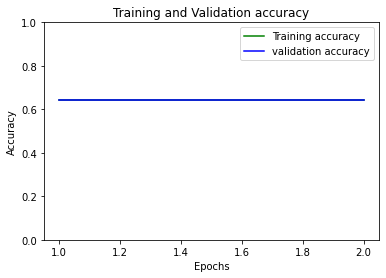

In [49]:
accuracy_visualization(nasdaq_tweets_history)

In [ ]:
nasdaq_vader_news_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_vader_news.csv')
    
nasdaq_news_history=news_start(nasdaq_vader_news_path)



model training
reading news..
       Unnamed: 0       dates ticker  compound_vader_score  pred_label  \
0               0     01:00AM   PRCP              0.663300           2   
1               1     01:00PM   HYAC              0.670500           2   
2               2     01:03PM   RELV             -0.361200           0   
3               3     01:05PM  GLIBA              0.745600           2   
4               4     01:08PM   DXLG              0.510600           2   
...           ...         ...    ...                   ...         ...   
92144       92144  2021-01-11     YY              0.080133           2   
92145       92145  2021-01-11   ZCMD              0.051600           2   
92146       92146  2021-01-11     ZM              0.636900           2   
92147       92147  2021-01-11     ZS              0.340000           2   
92148       92148  2021-01-11   ZUMZ              0.401900           2   

                                                    news  
0      ATA Creativity 

/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>
converting examples to tf_datasets
validation..
Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x14f2e0355b38> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x14f2e0355b38> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


   4115/Unknown - 1138s 277ms/step - loss: 0.4907 - accuracy: 0.8175

In [ ]:
accuracy_visualization(nasdaq_news_history)

In [ ]:
nyse_vader_news_path=os.path.join(dir_name,'train-data/nyse/nyse_vader_news.csv')
nyse_news_history=news_start(nyse_vader_news_path)


In [ ]:
accuracy_visualization(nyse_news_history)

In [ ]:
nyse_vader_tweets_path=os.path.join(dir_name,'train-data/nyse/nyse_vader_tweets.csv')
nyse_tweets_history=start(nyse_vader_tweets_path)


In [ ]:
accuracy_visualization(nyse_tweets_history)

In [ ]:
# start('nyse_labelled_tweets.csv')

In [43]:

hkex_news_history=os.path.join(dir_name,'train-data/hkex/hkex_vader_news.csv')
hkex_news_history=news_start(hkex_news_history)

# hkex_news_history=news_start('hkex_labelled_news.csv')


model training
reading news..
      Unnamed: 0       dates  ticker  compound_vader_score  pred_label  \
0              0  2012-10-29   80737                0.0722           1   
1              1  2013-04-18    4508               -0.4767          -1   
2              2  2013-09-02    5924               -0.4767          -1   
3              3  2013-09-03    5924                0.3612           1   
4              4  2013-11-21    2951               -0.1280          -1   
...          ...         ...     ...                   ...         ...   
2073        2073  2021-01-13    1928                0.3182           1   
2074        2074  2021-01-13    2282                0.3182           1   
2075        2075  2021-01-13    2318               -0.4019          -1   
2076        2076  2021-01-13    2800               -0.4404          -1   
2077        2077  2021-01-13    9988                0.6249           1   

                                                   news  
0      HSI Widens Gain 

/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>
converting examples to tf_datasets


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


validation..
Epoch 1/5


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


    260/Unknown - 121s 467ms/step - loss: nan - accuracy: 0.8929

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


260/260 [==============================] - 127s 488ms/step - loss: nan - accuracy: 0.8929 - val_loss: nan - val_accuracy: 0.8942
Epoch 2/5
260/260 [==============================] - 127s 487ms/step - loss: nan - accuracy: 0.8929 - val_loss: nan - val_accuracy: 0.8942
Epoch 3/5
260/260 [==============================] - 128s 494ms/step - loss: nan - accuracy: 0.8929 - val_loss: nan - val_accuracy: 0.8942
Epoch 4/5
260/260 [==============================] - 128s 494ms/step - loss: nan - accuracy: 0.8929 - val_loss: nan - val_accuracy: 0.8942
Epoch 5/5
260/260 [==============================] - 128s 493ms/step - loss: nan - accuracy: 0.8929 - val_loss: nan - val_accuracy: 0.8942


visualization
[0.89290011 0.89290011 0.89290011 0.89290011 0.89290011]
[0.89423078 0.89423078 0.89423078 0.89423078 0.89423078]


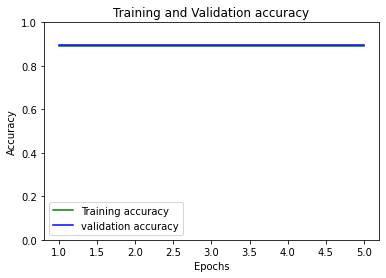

In [44]:
accuracy_visualization(hkex_news_history)

In [4]:
import os 

# create folder
# for list in df:
#     for name in list:
#         try:  
#             path='/userhome/cs/wuxue/Sentiment_Analysis/results/us/'+str(name)+'/trends'
#             os.mkdir(path)  
#         except OSError as error:  
#             print(error)  
# df = pd.DataFrame(columns = ['dates' , 'tweets', 'label'])
# for list in nasdaq_df:
#      for name in list:
#             try:
#                 df_tweets = pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/data-tweets/data-$%s-tweets.csv'%name ,names=['dates','tweets'],index_col='dates')
#                 df_dates=pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/stock_label/data-%s-label.csv'%name,names=['dates','label'],index_col='dates')

#                 merge=pd.merge(df_tweets,df_dates, how='inner', left_index=True, right_index=True)
#                 df=df.append(merge)
                
#             except:
#                 print('no such file exist')
#                 pass
# df.to_csv('labelled_tweets.csv')

    # merge.reset_index(drop=True)
    # x, y = merge.iloc[:, :-1], merge.iloc[:, [-1]]

    # df=merge.drop('dates',axis=1)
           
           


In [ ]:
# pred_sentences = ['This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good',
#                   'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie']


In [5]:
# import statistics 
# from statistics import mode
# from datetime import datetime

# def trends(ticker):
#     df_tweets = pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/data-tweets/data-$%s-tweets.csv'%ticker ,names=['dates','tweets'],index_col='dates')
#     df_dates=pd.read_csv('/userhome/cs/wuxue/Sentiment_Analysis/stock_label/data-%s-label.csv'%ticker,names=['dates','label'],index_col='dates')

#     merge=pd.merge(df_tweets,df_dates, how='inner', left_index=True, right_index=True)
#     tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
#     tf_outputs = model(tf_batch)
    
#     tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

#     labels = ['Negative','neutral','Positive']
#     label = tf.argmax(tf_predictions, axis=1)

#     label = label.numpy()
#     trend=labels[mode(label)]
#     trend_path='/userhome/cs/wuxue/Sentiment_Analysis/results/us/'+ticker+'/trends/'+'trend-'+ticker+'.csv'
#      with open(trend_path,'w') as f:
#             writer = csv.writer(f)
#             date=datetime.now().strftime("%Y-%m-%d")
#             writer.writerow([date,trend])

        # print(mode(label))
# for i in range(len(pred_sentences)):
#     output.append()
#     print(pred_sentences[i], ": \n", labels[label[i]])